# Using Radial Profiles
Radial profiles are the bread and butter of what underlies the ``cluster_generator`` code. Each ``Radial_Profile`` object acts essentially as a unit carrying function just the same
as a standard function python or a lambda function in python. For example, let's look at the Hernquist density profile:


In [1]:
# Import cluster_generator
import cluster_generator as cg
import matplotlib.pyplot as plt
import numpy as np

# Generating the profile #
M_0 = 1e14 # (Msun)
a = 1000 # (kpc)

hern_profile = cg.radial_profiles.hernquist_density_profile(M_0,a)

Once the ``RadialProfile`` object is generated, it works basically like a standard function:

(<Figure size 1000x1000 with 1 Axes>, <Axes: xlabel='Radius (kpc)'>)

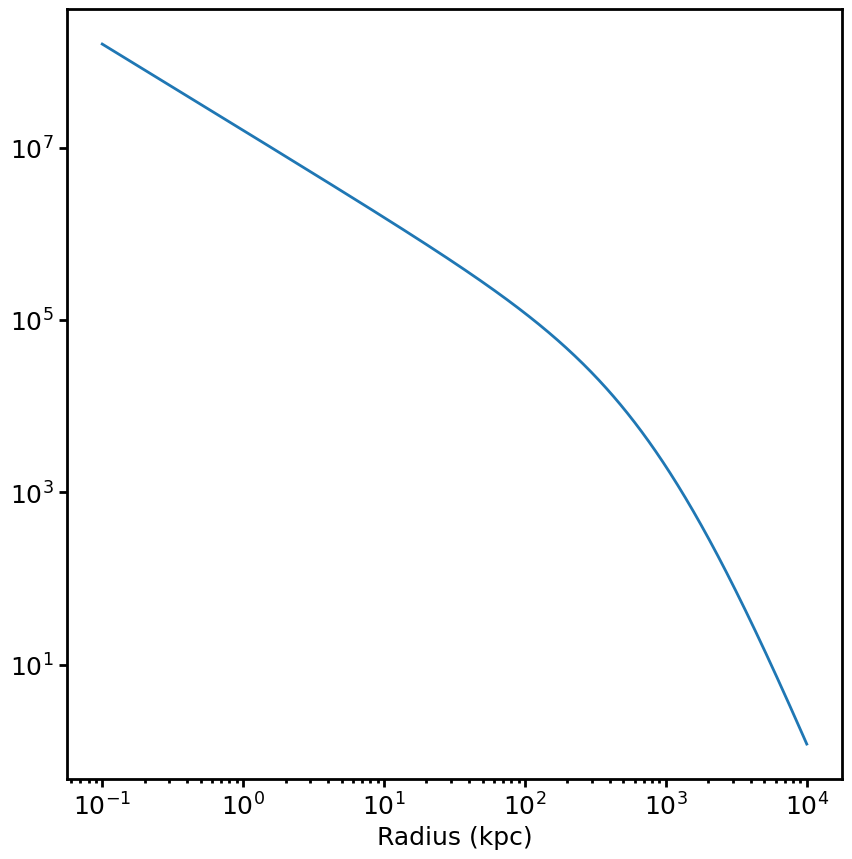

In [2]:
# plot the output
hern_profile.plot(rmin=1e-1,rmax=1e4)

Great! Now that we have the profile, its worth going over some of the important points regarding ``RadialProfile`` objects. First off, every ``RadialProfile`` instance is really just a fancy wrapper for an underlying function. They are callable and will return the value of the profile at the radius being input. Note that ``RadialProfile`` objects have **no units**. They should always be generated in the "galactic units" which form the basis for the project. See the Introduction page for more information on the unit system. 
 

In [3]:
# - Calling a Radial Profile - #
print(f"The hernquist profile at r = {1000} kpc is {hern_profile(1000)}.")

# - Calling over an array - #
rr = np.geomspace(1e-1,1e4,10)
y = hern_profile(rr)
print(f"At the radii: {rr},")
print(f"hern_profile is {y}")

The hernquist profile at r = 1000 kpc is 1989.4367886486916.
At the radii: [1.00000000e-01 3.59381366e-01 1.29154967e+00 4.64158883e+00
 1.66810054e+01 5.99484250e+01 2.15443469e+02 7.74263683e+02
 2.78255940e+03 1.00000000e+04],
hern_profile is [1.59107206e+08 4.42380961e+07 1.22751658e+07 3.38158266e+06
 9.07912050e+05 2.22940080e+05 4.11417258e+04 3.68024519e+03
 1.05686232e+02 1.19575464e+00]


Awesome, but what if we want to actually provide units? Units in the ``cluster_generator`` project are managed by the ``unyt`` unit package. To add units to a ``RadialProfile``, we first compute the output array and then manually assign units:


In [4]:
from unyt import unyt_array

rr = unyt_array(np.geomspace(1e-1,1e4,10),"kpc")
yy = unyt_array(hern_profile(rr.d),"Msun/kpc**3")
print(f"At the radii: {rr},")
print(f"hern_profile is {yy}")

yy = yy.to("kg/m**3")

print(f"hern_profile is {yy}")

At the radii: [1.00000000e-01 3.59381366e-01 1.29154967e+00 4.64158883e+00
 1.66810054e+01 5.99484250e+01 2.15443469e+02 7.74263683e+02
 2.78255940e+03 1.00000000e+04] kpc,
hern_profile is [1.59107206e+08 4.42380961e+07 1.22751658e+07 3.38158266e+06
 9.07912050e+05 2.22940080e+05 4.11417258e+04 3.68024519e+03
 1.05686232e+02 1.19575464e+00] Msun/kpc**3
hern_profile is [1.07682575e-20 2.99400148e-21 8.30774104e-22 2.28863002e-22
 6.14468131e-23 1.50884190e-23 2.78444144e-24 2.49076260e-25
 7.15276570e-27 8.09277860e-29] kg/m**3


# More Advanced Usage
``RadialProfile`` objects are really simple; however, there is some under-the-hood functionality that can be extremely useful. The first of these is the ability to make useful mathematical alterations to the ``RadialProfile`` using either
the ``.add_core`` method or the ``.cutoff`` function.


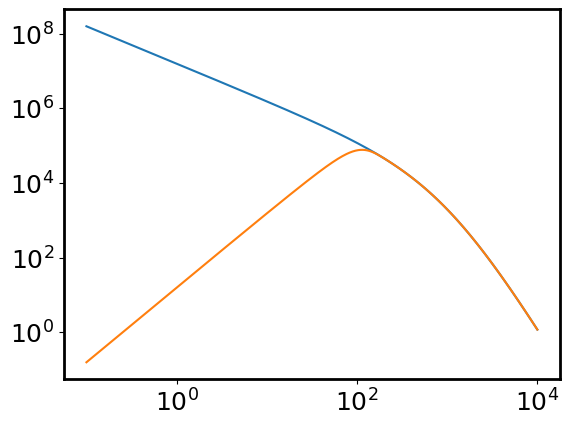

In [5]:
# Adding a core to the radial profile #
rr = unyt_array(np.geomspace(1e-1,1e4,1000))
no_core = hern_profile(rr.d)

cored_hern_profile = hern_profile.add_core(100,3) # Add a core at r = 100 kpc

core = cored_hern_profile(rr.d)

plt.loglog(rr.d,no_core)
plt.loglog(rr.d,core)
plt.show()

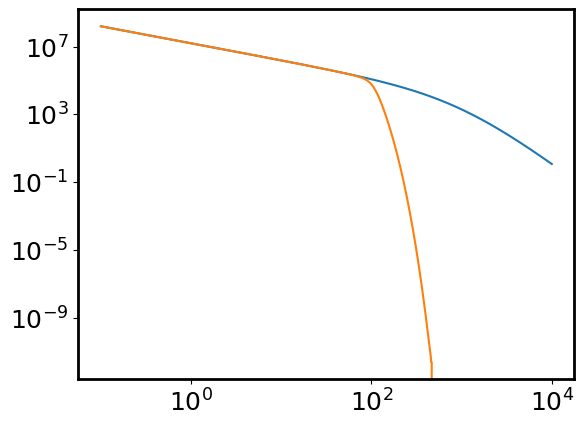

In [6]:
# Truncating the profile
rr = unyt_array(np.geomspace(1e-1,1e4,1000))
no_cut = hern_profile(rr.d)

t_hern_profile = hern_profile.cutoff(100) # Add cutoff at 100

cut = t_hern_profile(rr.d)

plt.loglog(rr.d,no_cut)
plt.loglog(rr.d,cut)
plt.show()

For more information on advanced usage of ``RadialProfiles``, see the example page on ``RadialProfiles``, which provides a more complete picture.